In [73]:
# libraries
import numpy as np
import pandas as pd
import os
import re

from operator import truediv
from matplotlib.pyplot import figure
from matplotlib import gridspec
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
rcParams['font.weight'] = 100
import matplotlib.pyplot as plt
%matplotlib inline


def extract_current(speeds):
    result = re.findall(r"[-+]?\d*\.\d+|\d+", speeds)
    return float(result[0])

def extract_time(time):
    result = re.findall(r"[-+]?\d*\.\d+|\d+", time)
    return int(float(result[1]))

def Read(workload, folder = "."):
    wa = [1,2,3,4]
    wip   = pd.DataFrame(columns = ['time', 'thread', 'count', 'speed']) 
    peb   = pd.DataFrame(columns = ['time', 'thread', 'count', 'speed']) 
    rocks = pd.DataFrame(columns = ['time', 'thread', 'count', 'speed']) 
    level = pd.DataFrame(columns = ['time', 'thread', 'count', 'speed']) 
    

    with open(folder + "/kv_" + workload + ".log") as origin_file:
        for line in origin_file:
            if line.startswith("2019/0"):
                data = line.strip().split()
                data = [data[i] for i in (10,3,4,7)]
                wip.loc[len(wip)] = data
            if line.startswith("WriteAm"): 
                data = line.split() #split string into a list
                wa[0] = float(data[1])
                
    with open(folder + "/peb_" + workload + ".log") as origin_file:
        for line in origin_file:
            if line.startswith("2019/0"):
                data = line.strip().split()
                data = [data[i] for i in (10,3,4,7)]
                peb.loc[len(peb)] = data
            if line.startswith("WriteAm"): 
                data = line.split() #split string into a list
                wa[1] = float(data[1])
                
    with open(folder + "/rocks_" + workload + ".log") as origin_file:
        for line in origin_file:
            if line.startswith("2019/0"):
                data = line.strip().split()
                data = [data[i] for i in (10,3,4,7)]
                rocks.loc[len(rocks)] = data
            if line.startswith(" Sum"): 
                data = line.split() #split string into a list
                wa[2] = float(data[11])
                
    with open(folder + "/level_" + workload + ".log") as origin_file:
        for line in origin_file:
            if line.startswith("2019/0"):
                data = line.strip().split()
                data = [data[i] for i in (10,3,4,7)]
                level.loc[len(level)] = data
            if line.startswith("WriteAm"): 
                data = line.split() #split string into a list
                wa[3] = float(data[1])
                
    df = pd.DataFrame(columns = []) 
    
    
    df['LevelDB']       = level['speed'].apply(extract_current)
    print("LevelDB record", level['speed'].count())
    df['LevelDB_write'] = level[level['thread']=="0:"]['speed'].apply(extract_current) / 1000.0
    df['LevelDB_read1']  = level[level['thread']=="1:"]['speed'].apply(extract_current) / 1000.0
    df['LevelDB_read2']  = level[level['thread']=="2:"]['speed'].apply(extract_current) / 1000.0
    df['LevelDB_read3']  = level[level['thread']=="3:"]['speed'].apply(extract_current) / 1000.0
    df['LevelDB_write_time'] = level[level['thread']=="0:"]['time'].apply(extract_time)
    df['LevelDB_read1_time'] = level[level['thread']=="1:"]['time'].apply(extract_time)
    df['LevelDB_read2_time'] = level[level['thread']=="2:"]['time'].apply(extract_time)
    df['LevelDB_read3_time'] = level[level['thread']=="3:"]['time'].apply(extract_time)
    
    df['WipDB']       = wip['speed'].apply(extract_current)
    print("WipDB record", wip['speed'].count())
    df['WipDB_write'] = wip[wip['thread']=="0:"]['speed'].apply(extract_current) / 1000.0
    df['WipDB_read1']  = wip[wip['thread']=="1:"]['speed'].apply(extract_current) / 1000.0
    df['WipDB_read2']  = wip[wip['thread']=="2:"]['speed'].apply(extract_current) / 1000.0
    df['WipDB_read3']  = wip[wip['thread']=="3:"]['speed'].apply(extract_current) / 1000.0
    df['WipDB_write_time'] = wip[wip['thread']=="0:"]['time'].apply(extract_time)
    df['WipDB_read1_time'] = wip[wip['thread']=="1:"]['time'].apply(extract_time)
    df['WipDB_read2_time'] = wip[wip['thread']=="2:"]['time'].apply(extract_time)
    df['WipDB_read3_time'] = wip[wip['thread']=="3:"]['time'].apply(extract_time)
    
    df['PebblesDB']       = peb['speed'].apply(extract_current)
    print("PebblesDB record", peb['speed'].count())
    df['PebblesDB_write'] = peb[peb['thread']=="0:"]['speed'].apply(extract_current) / 1000.0
    df['PebblesDB_read1']  = peb[peb['thread']=="1:"]['speed'].apply(extract_current) / 1000.0
    df['PebblesDB_read2']  = peb[peb['thread']=="2:"]['speed'].apply(extract_current) / 1000.0
    df['PebblesDB_read3']  = peb[peb['thread']=="3:"]['speed'].apply(extract_current) / 1000.0
    df['PebblesDB_write_time'] = peb[peb['thread']=="0:"]['time'].apply(extract_time)
    df['PebblesDB_read1_time'] = peb[peb['thread']=="1:"]['time'].apply(extract_time)
    df['PebblesDB_read2_time'] = peb[peb['thread']=="2:"]['time'].apply(extract_time)
    df['PebblesDB_read3_time'] = peb[peb['thread']=="3:"]['time'].apply(extract_time)
    
    df['RocksDB']       = rocks['speed'].apply(extract_current)
    print("RocksDB record", rocks['speed'].count())
    df['RocksDB_write'] = rocks[rocks['thread']=="0:"]['speed'].apply(extract_current) / 1000.0
    df['RocksDB_read1']  = rocks[rocks['thread']=="1:"]['speed'].apply(extract_current) / 1000.0
    df['RocksDB_read2']  = rocks[rocks['thread']=="2:"]['speed'].apply(extract_current) / 1000.0
    df['RocksDB_read3']  = rocks[rocks['thread']=="3:"]['speed'].apply(extract_current) / 1000.0
    df['RocksDB_write_time'] = rocks[rocks['thread']=="0:"]['time'].apply(extract_time)
    df['RocksDB_read1_time'] = rocks[rocks['thread']=="1:"]['time'].apply(extract_time)
    df['RocksDB_read2_time'] = rocks[rocks['thread']=="2:"]['time'].apply(extract_time)
    df['RocksDB_read3_time'] = rocks[rocks['thread']=="3:"]['time'].apply(extract_time)
    
    
    df.to_csv("test.csv")
    return df, wa

def Plot(df, wa, ax, ylim=20, m_title="123", m_alpha=0.1, xlim=2000):
    words = ['WipDB', 'PebblesDB', 'RocksDB', 'LevelDB']
    for i in range(len(words)):            
        # plot write
        wdf = df[df[words[i] + '_write'].notnull()]
        wdf.plot(x=words[i]+'_write_time', y=words[i] + '_write', ax=ax[i], fontsize=16, color='darkgreen', markevery=1, markersize=3,  alpha=0.9)
        ax[i].set_xlim([1, xlim])
        ax[i].set_ylim([1, 210])
        ax[i].tick_params(axis='y', colors='darkgreen', pad=-3)
        
        # print db name
        ax[i].text(xlim - xlim*0.15, 10, words[i], horizontalalignment='center', fontsize=18)
        
    
        # plot read
        ax0t = ax[i].twinx()
        
        df[df[words[i] + '_read1'].notnull()].plot(x=words[i] + '_read1_time', y=words[i] + '_read1', ax=ax0t, fontsize=16, color='b', dashes=[4, 2], markersize=3,  alpha=0.8)
        df[df[words[i] + '_read2'].notnull()].plot(x=words[i] + '_read2_time', y=words[i] + '_read2', ax=ax0t, fontsize=16, color='b', dashes=[4, 2], markersize=3,  alpha=0.8)
        df[df[words[i] + '_read3'].notnull()].plot(x=words[i] + '_read3_time', y=words[i] + '_read3', ax=ax0t, fontsize=16, color='b', dashes=[4, 2], markersize=3,  alpha=0.8)
        
    
        rdf = pd.DataFrame(columns = ['read', 'time']) 
        rdf['time'] = df[df[words[i] + '_read1'].notnull()].reset_index()[words[i] + '_read1_time']
        rdf['read'] = df[df[words[i] + '_read1'].notnull()].reset_index()[words[i] + '_read1']
        rdf['read'] = rdf['read'] + df[df[words[i] + '_read2'].notnull()].reset_index()[words[i] + '_read2']
        rdf['read'] = rdf['read'] + df[df[words[i] + '_read3'].notnull()].reset_index()[words[i] + '_read3']
#         rdf.plot(x='time', y='read', ax=ax0t, fontsize=16, color='b', dashes=[4, 2], markersize=3,  alpha=0.8)
        
        print(rdf)
        ax0t.set_xlim([1, xlim])
        ax0t.set_ylim([1, ylim])
        ax0t.tick_params(axis='y', colors='b', pad=-6, labelrotation=-90, labelsize=12)

        ax[i].legend().set_visible(False)
        ax0t.legend().set_visible(False)
        
        if (i == 0):
            ax[i].legend(["Write"] , fontsize=18, frameon=False, bbox_to_anchor=(0., 0.85, 0.5, .1), loc='lower left')
            ax0t.legend(["Read"], fontsize=18, frameon=False, bbox_to_anchor=(0.5, 0.85, 0.5, .1), loc='lower right')
            
        
        if i == 3:
            ax[i].text(xlim*0.35, -80, m_title, fontsize=18)
            
#         ax[i].xaxis.set_ticks(np.arange(0, xlim, 600))
#         ax0t.xaxis.set_ticks(np.arange(0, xlim, 600))
            
            
        ax[i].grid(axis='y', linestyle='--')
        
        

LevelDB record 914
WipDB record 893
PebblesDB record 1203
RocksDB record 787
        read    time
0     0.0658     0.0
1     5.1525    20.0
2     8.9390    40.0
3    13.1627    60.0
4    16.8333    80.0
..       ...     ...
273  27.9044  5460.0
274  26.9975  5480.0
275      NaN  5500.0
276      NaN  5520.0
277      NaN  5540.0

[278 rows x 2 columns]
        read    time
0     0.1889     0.0
1     6.6754    20.0
2    13.2312    40.0
3    15.3530    60.0
4    19.1821    80.0
..       ...     ...
277  19.8935  5540.0
278  19.8533  5560.0
279  19.8726  5580.0
280  20.0594  5600.0
281      NaN  5620.0

[282 rows x 2 columns]
        read    time
0     7.6271    20.0
1    11.6576    40.0
2    12.5767    60.0
3    13.8415    80.0
4    15.7368   100.0
..       ...     ...
236  33.6564  4753.0
237  33.7637  4773.0
238  33.7775  4793.0
239  33.6666  4813.0
240  33.7537  4833.0

[241 rows x 2 columns]
        read    time
0     0.1149     0.0
1    12.1330    20.0
2    16.1737    40.0
3    17.254

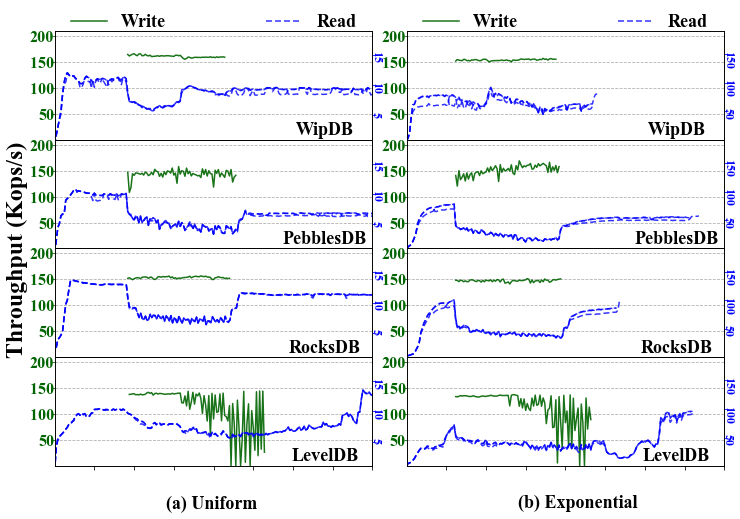

In [78]:
fig = plt.figure(figsize=(12, 8)) 
gs = gridspec.GridSpec(8, 20) 
gs.update(wspace=30, hspace=0) # set the spacing between axes. 
ax = [1,2,3,4]

df, wa = Read("readuniwhilewriting", "uni")
ax[0] = plt.subplot(gs[:2, 0:10])
ax[1] = plt.subplot(gs[2:4, 0:10])
ax[2] = plt.subplot(gs[4:6, 0:10])
ax[3] = plt.subplot(gs[6:8, 0:10])
Plot(df, wa, ax, 19, "(a) Uniform", 0.07, 4000)

df, wa = Read("readexpwhilewriting", "exp")
ax[0] = plt.subplot(gs[:2,  10:])
ax[1] = plt.subplot(gs[2:4, 10:])
ax[2] = plt.subplot(gs[4:6, 10:])
ax[3] = plt.subplot(gs[6:8, 10:])
Plot(df, wa, ax, 191, "(b) Exponential", 0.07, 4000)


fig.text(0.07, 0.5, 'Throughput (Kops/s)', va='center', rotation='vertical', fontsize=24)

plt.savefig('readwhilewriting_exp.pdf', bbox_inches='tight')